# Abstract

In this project, we address the problem of minimizing a convex, separable, nonsmooth function subject to linear constraints. We propose a numerical method that extends the Chambolle-Pock primal-dual algorithm by incorporating block-coordinate updates. Unlike existing approaches, our method does not rely on assumptions such as smoothness or strong convexity of the objective function, full-rank conditions on the matrix, strong duality, or consistency of the linear system. This allows our method to converge even in cases of misspecified or noisy systems. We provide theoretical guarantees for the convergence of our algorithm and demonstrate its effectiveness through numerical experiments.


# 1 Introduction
We propose a randomized coordinate primal-dual algorithm for convex optimization problems of the form


$$
\underset{x} {\min} g(x)  \quad s.t.  x   \in  \left\{ \underset{z} {\arg\min} \ \frac{1}{2}|{Az - b}\|^2  \right\} \quad\quad\quad\quad\quad  (1)
$$


This is a generalization of the more commonly encountered linear constrained convex optimization problem.

When b is in the range of A problem (2) and (1) have the same optimal solutions;but (1) has the advantage of having solutions even when b is not in the range of A. Such problems will be called ***inconsistent*** in what follows. Of course, the solution set to (1) can be modeled by a problem with the format (2) via the normal equations.



$\quad$ The main point of project is that the two models suggest very different algorithms with different behaviors We do not assume that g is smooth, but this is not our main concern. Our main focus in this note is the efficient use of problem structure. In particular, we assume throughout that the problem can be decomposed in the following manner.



$For x \in \mathbb{R}^{m}, A \in \mathbb{R}^{mxn} \quad A = [A_1.....A_p] \quad and \quad g(x) = p \sum_{i=1}^p gi(xi)$ ;



where $x_{i}\in\mathbb{R}^{n_{i}}$  $\sum_{i=1}^p$ $n_i = n, A_i \in \mathbb{R}^{mxn_i} \quad and \quad   g_i : R^n_i \to   (-\infty;\infty]$ is proper, convex and lower semi-continuous (lsc). The coordinate primal-dual method we propose below allows one to achieve improved stepsize choice, tailored to the individual blocks of coordinates. To this, we add an intrinsic randomization to the algorithm which is particularly well suited for large-scale problems and distributed implementations. Another interesting property of the proposed method is that in the absence of the existence of Lagrange multipliers one can still obtain meaningful convergence results.



$\quad$ Randomization is currently the leading technique for handling extremely largescale problems. Algorithms employing some sort of randomization have been around for more than 50 years, but they have only recently emerged as the preferred – indeed, sometimes the only feasible – numerical strategy for large-scale problems in machine learning and data analysis. The dominant randomization strategies can be divided roughly into two categories. To the first category belong stochastic methods, where in every iteration the full vector is updated, but only a fraction of the given data is used. The main motivation behind such methods is to generate descentdirections cheaply. Another category is coordinate-block methods. These methods update only one coordinate (or one block of coordinates) in every iteration. As with stochastic methods, the per iteration cost is very low since only a fraction of the data is used,but coordinate-block methods can also be accelerated by choosing larger step sizes.



To keep the presentation simple, we eschew many possible generalizations and extensions of our proposed method. For concreteness we focus our attention on the primal-dual algorithm (PDA) of Chambolle-Pock. The PDA is a well-known first-order method for solving saddle point problems with nonsmooth structure. It is based on the proximal mapping associated with a function g defined by $prox_{\tau g} =(Id+\tau \partial g)^{−1}$ where $\partial g(x)$ is the convex subdifferential of g at $\bar x$ , defined as the setBlock-coordinate primal-dual method 3
of all vectors v with 

$$g(x)−g(\bar x)− ⟨v;x − \bar x⟩ \leq 0 \quad \forall x. \quad\quad\quad(3)$$


The PDA applied to the Lagrangian of problem (2) generates two sequences $(x^k),(y^k)$ via 

$$x^{k+1} = prox_{\tau g}(x^k −\tau A^T y^k)\\
y^{k+1} = y^k + \sigma (A(2x^{k+1} −x^k)−b).\quad\quad (4)$$

* Alternative approaches such as the alternating direction method of multipliers are also currently popular for large-scale problems and are based on the augmented Lagrangian of (2). The advantage of PDA over ADMM, however, is that it does not require one to invert the matrix A, and hence can be applied to very large-scale problems.

------------------------------------------------------------
**Algorithm 1 Coordinate primal-dual algorithm**

------------------------------------------------------------
 $1: \quad Choose \quad x^0 \in  \mathbb{R}^{n}, \tau \in \mathbb{R}^{p}_{++} ,\sigma > 0, \quad and \quad set \quad y^0 = u^0 = \sigma (Ax^0 −b).$ 

 $2: \quad for \quad k = 0,1,2,...... do$ 

 $3:\quad\quad x^{k+1} = x^k$ 

 $4:\quad\quad Pick \quad an\quad index\quad i \in \{1,.....,p\} \quad uniformly \quad at\quad  random.$ 

 $5: \quad\quad x^{k+1} _i = prox_{ \frac {\tau_i} {p} g_i}(x^k _i − \frac{\tau}  {p_i} A^T _i y^k), t_i = x^{k+1} _i −x_i ^k$ 

 $6:\quad\quad y^{k+1} = y^k + u^k + \sigma (p + 1)A_it_i$ 

 $7: \quad\quad u^{k+1} = u^k + \sigma A_it_i$ 
 
 $8: end for$ 

----------------------------------------------------

The procedure we study in this note is given in Algorithm 1. The cost per iteration is very low: it requires two dot products $A_i t_i$, $A^T _i y^k$; and the full vector-vector operation is needed only for the dual variables $y^k;u^k$ in steps 6–7. 



The algorithm will therefore be the most efficient if m ≤ n. If in particular all blocks are of size 1, that is $n_i = 1, n = p$ and $A_i$ is just the $i^{th}$ column of the matrix A, then $A_i\cdot t_i$ reduces to the vector-scalar multiplication and $A^T _i \cdot y^k$ to the vector-vector dot product.



Moreover, if the matrix A is sparse and $A_i$ is its $i^{th}$ column , then step 7 requires an update of only those coordinates which are nonzero in $A_i$. 


The memory storage is also relatively small: we have to keep $x_k$, and two dual variables $y^k , u^k$. Another important feature of the proposed algorithm is that it is well suited for the distributed optimization: since there are no operations with a full primal vector, we can keep different bocks $x_i$ on different machines which are coupled only over dual variables.



$\quad$ We want to highlight that with p = 1 the proposed algorithm indeed coincides with the primal-dual algorithm of Chambolle-Pock. In fact, in this case it is not difficult to prove by induction that $u^k = \sigma (Ax^k − b) \quad and\quad hence, y^{k+1} = y^k +\sigma (A(2x^{k+1} −x^k)−b).$


The key feature of Algorithm 1 is that it requires neither strong duality nor the consistency of the system Ax = b to achieve good numerical performance with convergence guarantees. This allows us, for instance,to recover the signals from noisy measurements without any knowledge about the noise or without the need to tune some external parameters as one must for lasso or basis denoising problems.



$\quad$ In the next section we provide possible applications and connections to other approaches in the literature. Section 3 is dedicated to the convergence analysis of our method. We also give an alternative form of the method and briefly discuss possible generalizations of the method.

# 2 Analysis

We first introduce some notation. For any vector $w = (w_1,.....,w_p) \in  \mathbb{R}^p _{++}$ we define the weighted norm by $ \|x\|^2 _w := \sum \limits {} ^{} w_i \|x\|^2 $ and the weighted proximal operator $prox^w _g \quad by$ ,

$$prox^w _g := (Id+Diag(w^{−1})\circ \partial g)^{−1} \\ = (Id+Diag(w^{−1})\circ \partial g)^{−1}\circ Diag(w^{−1})\circ Diag(w) \\ = (Diag(w)+ \partial g)^{−1} \circ Diag(w).$$

The weighted proximal operator has the following characteristic property (proxinequality):

$$\bar x = prox^w _g z \iff  \langle Diag(w)(\bar x−z), x −\bar x \rangle ≥ g(\bar x)−g(x) \quad \forall x \in  \mathbb{R}^n. \quad \quad \quad  (14)$$



(**Hint:**  by first-order condition for optimility if $f(x)=(g(x)+\frac{\|z-z\|^2}{w} )$ is convex then $ \bar x = \left\{ \underset{x}{\arg\min}(g(x)+   \frac{\|z-x\|^2}{w}  )\right\} \iff \langle     \partial (g(\bar x)+\frac{\|z-\bar x \|^2}{w} ) ,x- \bar x \rangle \le 0)$



From this point onwards we will fix

$$f(x) := \frac{1}{2} \|Ax-b\|^2 =\frac{1}{2}\langle Ax-b\rangle ^T \langle Ax-b \rangle \quad \quad (15)$$




Then $\nabla f(x) = A^T (Ax − b)$ and its partial derivative corresponding to i-th block is $\nabla _i f(x) = A^T _i (Ax − b).$ Let $ \lambda = (\lambda _1 ,...... \lambda _p)$, where $\lambda _i$ is the largest eigenvalue of $A^T _i \dot A_i$, that is $\lambda _i = \lambda  _{max} (A^T _i A_i).$ Then the Lipschitz constant of the i-th partial gradient is $\|A_i\|^2 = \lambda _i.$

 $\|A_i\|^2= {\underset{x\in \mathbb{R}^d} {\max} \frac{\langle A_ix,A_ix \rangle}{\langle x,x \rangle}}$ 


$$={\underset{x\in \mathbb{R}^d,\|x\|^2 =1} {\max}{\langle A_ix,A_ix \rangle}}$$


$$={\underset{x\in \mathbb{R}^d,\|x\|^2 =1} {\max}{x^T A^T _i A_i x}} \quad as \quad is \quad largest \quad eigenvalue \quad of A_I ^T A_i$$


$$= {\underset{x\in \mathbb{R}^d,\|x\|^2 =1} {\max}{x^T \lambda _i x}}$$


$$= \lambda _i {\underset{x\in \mathbb{R}^d,\|x\|^2 =1} {\max}{\|x\|^2}}$$


$$=\lambda _i$$




By $U_i : \mathbb{R}^n \to \mathbb{R}^n$ we denote the projection operator: $U_i ^x = (0,...,x_i ,....., 0).$ Since $f$ is quadratic, it follows that for any $x,y \in \mathbb{R}^n$.


$$f(y)− f (x)− \langle \nabla f(x),y−x \rangle = \frac{1}{2} \|A(x−y)\|^2.\quad \quad (16)$$


to prove above equality we can use $f(y)-f(x)=\frac{1}{2} \langle{Ay-b,Ay-b} \rangle - \frac{1}{2} \langle {Ax-b.Ax-b}\rangle \quad also \quad \nabla f(x)=A^T (Ax-b)$.




We also have that for any $x,t \in \mathbb{R}^n$

$$f (x+U_i ^t) = f(x)+\langle \nabla f(x), U_i ^t \rangle +\frac{1}{2} \|A_it_i\|^2 \leqslant f(x)+\langle \nabla f(x), U_i ^t \rangle + \frac {\lambda _i}{2}\|t_i\|^2. \quad \quad (17).$$



Now since $i$ is a uniformly distributed random number over {1,2,.....,p},from the above it follows


$$ \mathbb{E}[f(x+U_i ^t)] \le \mathbb{E} [f(x)+\langle \nabla f(x), U_i ^t \rangle + \frac {\lambda _i}{2}\|t_i\|^2]
\\= f(x)+\langle \nabla f(x),\mathbb{E} [U_i ^t] \rangle + \frac {1}{2}\mathbb{E}[\lambda _i\|t_i\|^2]
\\= f(x)+\langle \nabla f(x), \frac {1}{p} \cdot t \rangle + \frac {1}{2} \cdot \frac {1}{p} \|t_i\|^2 _{\lambda _i}
\\ \mathbb{E}[f(x+U_i ^t)] \leqslant f(x)+ \frac{1}{p} \langle \nabla f(x), t \rangle + \frac{1}{2p} \|t\|^2 _{\lambda}. \quad \quad  (18)$$.



$\quad$ For our analysis it is more convenient to work with Algorithm 2 given below. It is equivalent to Algorithm 1 when the random variable i for the blocks are the same, though this might be not obvious at first glance. We give a short proof of this fact. Notice also that Algorithm 2 is entirely primal. The formulation of Algorithm 2 with p = 1 (not random!) is related to the Tseng proximal gradient method and to its stochastic extension, the APPROX method. The proposed method requires stepsizes: $\sigma > 0 and \tau \in \mathbb{R}_{++} ^p.$ The necessary condition for convergence of Algorithms 1 and 2 is, as we will see, $\tau _i \sigma \|A_i\|^2 < 1.$ We have strict inequality for the same reason that one needs ts∥A∥2 < 1 in the original PDA.


---------------------------------------------------------------------------------------------------------------------------------------------------------
**Algorithm 2 Coordinate primal-dual algorithm (equivalent form)**

---------------------------------------------------------------------------------------------------------------------------------------------------------
$ 1: \quad Choose x^0 \in \mathbb{R}^n, \sigma > 0, \tau \in \mathbb{R}_{++} ^p and set s^0 = x^0, \theta _0 =1$ .

$2:\quad for \quad k = 0,1,2,.... do$ .

$3:\quad \quad  z_k = \theta _k x_k + (1 − \theta _k)s^k$ 

$4:\quad \quad x^{k+1} = x^k, s^{k+1} = z^k$  

$5: \quad \quad Pick\quad an \quad index \quad i \in \{ 1,....,p\} \quad uniformly \quad at\quad random$ .

$6:\quad \quad x^{k+1} _i = prox _{\frac {\tau _i}{p} g_i} (x_i ^k − \frac{\tau _i \sigma}{ p\theta _k} \nabla_i f(z^k))$ 

$7:\quad \quad s^{k+1} -i = z^k _i + p\theta _k(x^{k+1}_i − x_i ^k)$ 

$8: \quad \quad \theta _k+1 = \frac{1}{k+2}$ 

$9: end for $ 

---------------------------------------------------------------------------------------------------------------------------------------------------------

Let $f_∗ = min f$ and S be the solution set of (1). Observe that if the linear system $Ax = b$ is consistent, then $f_∗$ = 0 and $argmin f = \{x : Ax = b\}. Otherwise, f_∗ > 0$ and $argmin f = \{x: A_T A x = A^T b\}.$ We will often use an important simple identity:

$f(x) − f(\bar x) =  \ \frac{1}{2}|A(x − \bar x)\|^2$  $\quad \quad ( \forall x \in \mathbb{R}^n)$ $(\forall \bar x \in s) \quad (19)$ .

**Proposition 1** *If the index i selected at iteration k in step 4 of Algorithm 1 is identical to the index i selected at iteration k in step 5 of Algorithm 2, then both algorithms with the same starting point $x^0$ generate the same sequence $(x^k)$*

***proof:***  We show that from Algorithm 2 one can recover all iterates of Algorithm 1 by setting $y^k = \frac {\sigma}{\theta _k}(Az^k -b),u^k=\sigma (Ax^k -b).$


then the preposition follows, since with $\nabla _i f(x)=A_i ^T (Ax-b)$ we have 
 

$$x_i ^{k+1}= prox_{{\frac{\tau _i}{p}}g_i}(x_i ^k - \frac {\tau _i \sigma}{p \theta _k} A_i ^T (Az^k -b ))= prox_{{\frac{\tau _i}{p}}g_i}(x_i ^k - \frac {\tau _i}{p}A_i ^T y^k).$$


Evidently,for k=0,,one has $y^0 = \sigma(Az^0-b)=\sigma(Ax^0b)=u^0.$ Assume it holds for some k $\ge$ 0.By step 3 in Algorithm 2,we have


$$Az^{k+1}=\theta _{k+1}Ax^{k+1}+(1-\theta _{k+1}As^{k+1})=\theta _{k+1}(Ax^k + A_i t_i)+(1-\theta _{k+1})(Az^k + p \theta _k A_i t_i)$$


where we have used that $Ax^{k+1}=Ax^k+A_i t_i$ .Hence,

$\frac{\sigma }{\theta _{k+1}} (Az^{k+1}-b)=\sigma (Ax^k -b)+\frac {\sigma }{\theta _k}(Az^k-b)+\sigma (p+1)A_i \cdot t_i=u^k =y^k+\sigma (p+1)A_it_i$ ,

$thus \quad y^{k+1}=\frac{\sigma }{\theta _{k+1}}(Az^{k+1}-b).Finally, \sigma (Ax^{k+1}-b)=u^k+\sigma A_it_i=u^{k+1}$ .

We are now ready to state our main result. Since the iterates given by Algorithm 2 are random variables, our convergence result is of a probabilistic nature. Notice also that equalities and inequalities involving random variables should be always understood to hold almost surely, even if the latter is not explicitly stated.



The next lemma uses the following notation for the full update, $\hat x ^{k+1}$, of $x^k$ in the k-th iteration of Algorithm 2, namely


$$\hat x ^{k+1}=prox^{\tau ^{-1}} _{g /p}(x^k - \frac{k+1}{p} \sigma Diag (\tau) \nabla f(z^k))$$

**Lemma 1.** *for any fixed x $\in \mathbb{R}^n$ and any k $\in \mathbb{N}$ the following inequality holds:*


$$\frac {p}{2}\|\hat x ^{k+1} -x^k\|^2 _{\tau _{-1}}+ \frac {\sigma}{\theta _k}\langle \nabla f(z^k),\hat x^{k+1}-x \rangle +g(\hat x^{k+1}-g(x))\le \frac{p}{2}\|x^k -x\|^2 _{\tau _{-1}} - \frac {p}{2}\|\hat x ^{k+1} - x\|^2 _{\tau{-1}} \quad \quad   (21)$$

***proof:*** By the prox-inequality (14) by replacing w with $\tau ^{-1}$  and with $\hat x^{k+1}$ given by (20) we have, 

$(Diag(\tau ^{-1})+\frac{1}{p} \partial g)^{−1} \circ Diag(\tau ^{-1})(x^k - \frac{k+1}{p} \sigma Diag (\tau) \nabla f(z^k))$ .

$ \iff \langle (Diag(\tau ^{-1})(\hat x^{k+1} - x ^k)+\frac{k+1}{p} \sigma \nabla f(z^k),x-\hat x^{k+1} \rangle  \ge \frac{1}{p}[g(\hat x^{k+1}) - g(x)]$ 

$ \iff \langle Daig(\tau ^{-1})(\hat x^{k+1} - x),x-\hat x^{k+1} \rangle + \frac {\sigma}{p\theta _k}\langle \nabla f(z^k), x-\hat x^{k+1}\rangle \ge \frac {1}{p}(g(\hat x^{k+1})-g(x))$ .

the statement then follows from the identity $\langle Daig(\tau ^{-1})(\hat x^{k+1} - x),x-\hat x^{k+1} \rangle = \frac{1}{2} \|x^k -x\|^2 _{\tau ^{-1}} - \frac{1}{2} \|\hat x^{k+1 }-x\|^2 _{\tau ^{-1}} -\frac{1}{2} \|\hat x^{k+1} -x^k\|^2 _{\tau ^{-1}}$ 


The next result provides a bound on the expectation of the residual at the (k+1)th iterate, conditioned on the kth iterate, which we denote by $\mathbb{E}_k.$

**Lemma 2:** *For any $x ^\ast \in \mathbb{S}$*


$$\frac{1}{\theta ^2 _k}\mathbb{E}_k[f(s^{k+1}) -f_\ast] \le \frac{1}{\theta ^2 _{k-1}}((f(s^{k}) -f_\ast) - (f(x^{k}) -f_\ast)) + \frac{1}{\theta _k} \langle \partial f(z^k),\hat x^{k+1} - x^\ast \rangle + \frac {p}{2}\|\hat x^{k+1} - x^{k}\|^2 _\lambda . \quad \quad (23)$$



***proof:*** First,by (18)


$$\mathbb{E}_k[f(s^{k+1})]\le \quad f(z^k) \quad + \quad \theta _k \langle \nabla f(z^k),\hat x^{k+1}-x^k\rangle \quad + \quad \theta ^2 _k \frac{p}{2}\|\hat x ^{k+1}-x^k\|^2 _\lambda$$


since f is quadratic (15),by (16) we have


$$f(s^k)-f(z^k)\quad =\langle \partial f(z^k),s^k-z^k \rangle \quad +\quad \frac{1}{2}\|A(s^k -z^k)\|^2 \\ =\frac{\theta _k}{1-\theta _k}\langle \partial f(z^k),z^k-x^k\rangle \quad + \quad \frac{1}{2}\|A(s^k - z^k)\|^2.  \quad (25)$$


By(16) and $\|\alpha a +(1-\alpha)b\|^2 = \alpha \|a\|^2 +(1-\alpha)\|b\|^2  - \alpha (1-\alpha)\|a-b\|^2$ ,we have, 



$$f_\ast -f(z^k)
\\=f(x^\ast)-f(z^k) 
\\= \langle\nabla f(z^k),x^\ast-z^k \rangle + \frac{1}{2} \|A(z^k -x^\ast)\|^2 
\\= \langle \nabla f(z^k),x^\ast -z^k \rangle \quad + \quad (1+ \theta _k)(f(s^k)-f_\ast) \quad - \quad \frac{1}{2}\theta _k(1-\theta _k)\|A(x^k -s^k)\|^2.(26)$$



Notice that $x^k -s^k =\frac{1}{\theta _k}$.


Hence,summation of $\frac {1-\theta _k}{\theta _k}$ (25) and (26) yields $\\ \frac{1-\theta _k}{\theta _k}f(s^k)-\frac{1}{\theta _k}f(z^k)+f_\ast \quad = \quad \langle \nabla f(z^k),x^\ast - x^k\rangle + \theta _k(f(x^k)-f_\ast)+(1-\theta _k)(f(s^k)-f_\ast),$ 



From which we comnclude $\frac {1}{\theta _k ^2} f(z^k)+\frac {1}{\theta _k} \langle \nabla f(z^k),x^\ast - x^k\rangle=  \frac {(1-\theta _k)^2}{\theta _k ^2}f(s^k)+\frac{2-\theta _k}{\theta _k} f_\ast -(f(x^k)-f_\ast).(28) $


Now  summing up (24) multiplied by 

$\frac{1}{\theta _k ^2}$ and (28),and using the identity $\frac{1-\theta _k}{\theta _k}=\frac{1}{\theta_k -1},$


$$\frac{1}{\theta _k ^2}\mathbb{E}[f(s^k)-f_\ast]\quad \le \quad \frac{1}{\theta ^2 _{k-1}}(f(s^k)-f_\ast)-(f(x^k)-f_\ast)+\frac{1}{\theta}\langle \nabla f(z^k),\hat x^{k+1}-x_\ast\rangle+\frac{p}{2}\|\hat x^{k+1}-x^k\|^2 _\lambda .\quad (29) \\ \square$$ 


The conditional expectation have the following useful representation.Expanding the expectation 


$$\mathbb{E}[\|x^{k+1}-x\|^2 _{\tau ^{-1}}] = \sum_{i=1}^p  \tau^{-1} _i \mathbb{E}_k [\|x_i ^{k+1}-x_i\|^2] \quad = \quad \sum_{i=1}^p \tau ^{-1} _i   (\frac{1}{p} \|\hat x^{k+1} _i -x \|^2 + \frac{p-1}{p}\|x^k-x\|^2 _{\tau ^{-1}})$$


This yields 



$$\mathbb{E}[\frac{p^2}{2}\|x^{k+1}-x\|^2 _{\tau ^{-1}}] = \sum_{i=1}^p (\frac{1}{p}g_i (\hat x^{k+1})+\frac{p-1}{p}g_i(x^k _i))=\frac{1}{p}g(\hat x^{k+1})+\frac{p-1}{p}g(x^k)$$



which gives



$$\mathbb{E}_k[g(x^{k+1} _i)]=\frac{1}{p}g(\hat x^{k+1})+(1-\frac{1}{p})g(x^k).$$



The next technical lemma is the last of the necessary preparations before proceding to the proof of the main theorem.



**Lemma 3.** The identity $s^{k+1} = \sum_{j=0}^{k+1} \beta^j_{k+1} x^j$ holds where the coefficients $(\beta^j_{k+1})^{k+1}_{j=0}$ are nonnegative and sum to 1. 

In particular, 

$\beta^j_{k+1} =
  \begin{cases}
    (1 - \theta_k) \beta^j_k, & \text{for } j = 0, \ldots, k-1 \\
    p \theta_{k-1}(1 - \theta_k) - (p - 1) \theta_k, & \text{for } j = k \\
    p \theta_k, & \text{for } j = k+1
  \end{cases}$ .
  
and  $\beta^k_{k+1} + (p+1) \theta_k = (1 - \theta_k) \beta^k_k.$

***Proof:*** It is easy to prove by induction.

**Base case (k = 0):**

For k = 0, we have $s^1 = x^0 = \beta^0_1 x^0$, which trivially holds with $\beta^0_1 = 1$.

**Inductive step:**

Assume that the identity holds for some $k = m$, i.e., $s^{m+1} = \sum_{j=0}^{m+1} \beta^j_{m+1} x^j$.

Now, we will prove that the identity also holds for $k = m+1$. We have:

$$
s^{m+2} = \theta_{m+1} s^{m+1} + (1 - \theta_{m+1}) x^{m+1} \\
= \theta_{m+1} \left(\sum_{j=0}^{m+1} \beta ^j_{m+1} x^j\right) + (1 - \theta_{m+1}) x^{m+1} \\
= \sum_{j=0}^{m+1} \theta_{m+1} \beta^j_{m+1} x^j + (1 - \theta_{m+1}) x^{m+1} \\
= \sum_{j=0}^{m+1} \left(\theta_{m+1} \beta^j_{m+1} x^j + (1 - \theta_{m+1}) \delta_{j, m+1} x^{m+1}\right)
$$

where $\delta_{j, m+1}$ is the Kronecker delta function.

Now, we need to determine the coefficients $\beta^j_{m+2}$ for $j = 0, 1, \ldots, m+1$. Using the provided expression for $\beta^j_{k+1}$, we have:

$$
\beta^j_{m+2} =
\begin{cases}
(1 - \theta_{m+1}) \beta^j_{m+1}, & \text{for } j = 0, 1, \ldots, m, \\
p \theta_m (1 - \theta_{m+1}) - (p - 1) \theta_{m+1}, & \text{for } j = m+1, \\
p \theta_{m+1}, & \text{for } j = m+2.
\end{cases}
$$

We need to verify that the coefficients $\beta^j_{m+2}$ are nonnegative and sum to 1.

- For $j = 0, 1, \ldots, m, (1 - \theta_{m+1}) \beta^j_{m+1}$ is nonnegative because $\beta^j_{m+1}$ are nonnegative and $0 \leq (1 - \theta_{m+1}) \leq 1$.
- For $j = m+1, p \theta_m (1 - \theta_{m+1}) - (p - 1) \theta_{m+1}$ can be written as $p \theta_m - (p - 1) \theta_{m+1}$, which is nonnegative because $p \geq 1 \quad and \quad 0 \leq \theta_m, \theta_{m+1} \leq 1$.
- For $j = m+2, p \theta_{m+1}$ is nonnegative because $p \geq 1$ and $0 \leq \theta_{m+1} \leq 1$.

Since each $\beta^j_{m+2}$ is nonnegative, the sum of all coefficients is 1, and the identity holds for \(k = m+1\).

Therefore, by mathematical induction, the lemma holds true for all $k \geq 0$.


#  Application for linear programming problem

Below is code expalaination for linear programming problem optimisation with code and output.

In the code, our objective is to minimize the function F(x) = $c^{T}x$ , where $ c $ is the cost function and $ x $ is a 4-dimensional vector. The function F(x) can be represented as:

F(x) = $5x_{1}+2x_{2}+3x_{3}+4x_{4}$

Moreover, we have two linear constraints given by:

 $26x_{1} + 26x_{2} + 24x_{3}+ 22x_{4} = 10$ 

 $26x_{1} + 36x_{2} + 43x_{3} + 11x_{4} = 12$

These constraints are represented as  Ax=b .

Then we apply an algorithm called the Coordinate Primal-Dual algorithm. Instead of taking each coordinate of $ x $, if we choose some block, then it is known as the Block-Coordinate Primal-Dual algorithm. This algorithm has many advantages compared to the primal-dual algorithm, such as converging faster (requiring fewer epochs), less computational power, and so on.

Before applying the algorithm, it's recommended to go through the algorithm from a paper for better understanding.

**Step 1**: Introduction of parameters such as $\tau$ and $\sigma$, known as step length, whose values are taken as 0.1 in the below code. $x^{0}$ = [0,0,0,0]  and $y_{0}$ = $u_{0}$ = $\sigma(Ax^{0}-b)$.

**Step 2**: For loop to run the algorithm over some number of iterations.

**Step 3**: Pick a uniformly random index i  from the number of blocks we have. For example, in our case, we have n because the dimension of  x is 4 and we take each coordinate as a block, so we have 4 number of blocks.

**Step 4**: Find  $X=({x_{i} - (\tau / n)  ({A_{i}}^T  y))}$; $x_{i}$ represents the $i^{th}$ element of  x, $ A_{i}$ represents the  $i^{th}$ column of  A , and  y represents the vector. 
Then find the proximal operator of  X  and assign this value to the $i^{th}$  element of x. For example, suppose $i^{th}$  is mean the $2^{nd}$ index is selected, $x_{2}$ = 0, $ A_{2}$ = [24,43],  y = [-1.0, -1.2] , and $ {\tau = \sigma}$ = 0.1 . So, X = 1.89 , then the proximal of $X$ = 0.9302325581395349 can be define by  ${(Id + \frac{\tau}{n} \cdot \nabla f_{i} (x))}^{-1}$.

Moreover, we find $t_{i}$ = $x_{new}$ - $x$, so it's the difference between the updated $x$  and the non-updated $x$ .

**Step 5**: Update $y_{k+1} \quad = \quad y_{k}\quad + \quad u_{k} \quad + \quad {\sigma*(n+1)*A_{i}* t_{i}}$ .

So, in our case, the updated value of  y  is [9.1627907 ,17.6]=[-1.0,-1.2] + [-1.0,-1.2] + 0.1* 5 * [24 , 43]* 0.9302325581395349.

**Step 6**: Update $u_{k+1}$ = $u_{k}$ + $\sigma A_{i} t_{i}$. 
So, in our case, the updated value of u  is [1.23255814, 2.8] = [-1.0, -1.2] + 0.1 * 0.9302325581395349 * [24, 43].

Then repeat it until the stopping criteria are met or until the number of iterations satisfies.


In [1]:
import numpy as np

c = np.array([5, 2, 3, 4])  # Cost vector
A = np.array([[26, 26, 24, 22],
              [26, 36, 43, 11],])  # Constraint matrix
b = np.array([10, 12])  # Right-hand side vector of constraints

def proximal_operator_g(xbar, tau):
    prox_g = 1/(1 + tau * c[i])
    return prox_g

# Define the stopping tolerance for the primal residual
primal_tolerance = 1e-6

# Initialize parameters for the optimization algorithm
tau = sigma = 0.1
m = len(c)
n = len(b)
X_List = []  # List to store updated values of x
x = np.zeros(m)  # Initial solution
y = u = sigma * (A @ x - b)  # Initial value of y and u

# Initialize iteration count
num_iterations = 0

# Optimization loop
for k in range(1000):
    # Increment the iteration count
    num_iterations += 1
    
    # Randomly select index i
    i = np.random.randint(m)
    
    # Compute X_i
    X = x[i] - (tau / n) * (A[:, i].T @ y)
    
    # Update the value of x_i
    x_new = x.copy()
    x_new[i] = proximal_operator_g(X, tau)
    
    # Compute t and update y and u
    t = x_new[i] - (X_List[-1][i] if X_List else x_new[i])
    y_new = y + u + sigma * (m + 1) * A[:, i] * t
    u_new = u + sigma * A[:, i] * t
    
    # Append the updated value of x to the list
    X_List.append(x_new.copy())
    
    # Check for convergence based on the primal residual
    primal_residual = np.linalg.norm(A @ x_new - b, ord=np.inf)
    if primal_residual < primal_tolerance:
        print("Convergence achieved based on primal residual.")
        break
    
    # Update x, y, and u for the next iteration
    x = x_new
    y = y_new
    u = u_new

# Output the final solution and number of iterations
print("Final solution (x):", x)
print("Number of iterations:", num_iterations)

Final solution (x): [0.66666667 0.83333333 0.76923077 0.71428571]
Number of iterations: 1000


# Application for composite optimmization

Below is code expalaination for composite optimisation with code and output. 

we have fisrt covex function $F(X)=X^{2}$ and $2^{nd}$ convex funcation is $G(X)=4X^{2}$


**1. Objective:**

The code aims to illustrate the proximal gradient descent algorithm for minimizing a convex function that is the sum of two convex functions, f(x) and g(x).


**2. Functions Defined:**


f(x)= ${x_{1}}^2 + {x_{2}}^2$ : A convex function defined as the sum of squares of its components. 


g(x)=4( ${x_{1}}^2 + {x_{2}}^2$ ): Another convex function, which is a scaled version of f(x).


**3. Proximal Operator ( $prox_{\tau g}$ (x)):**


The proximal operator is a fundamental concept in convex optimization used to find the minimum of a function that is the sum of a smooth function and a non-smooth function.In this code, the proximal_operator_g function computes the proximal operator for the function g(x) using a step size parameter $\tau$.


**4. Convex Subdifferential (∂g(x)):**


The convex subdifferential is a set-valued operator that generalizes the concept of derivative to convex functions that may not be differentiable.


The convex_subdifferential_g function calculates the convex subdifferential of the function g(x).


**5. Initialization and Iteration:**

The initial point x is set to [0.5,0.5]

Proximal gradient descent iteratively updates the point x using the proximal operator for g(x).

The process continues for a specified number of iterations.

**6. Plotting:**

The code generates a 3D plot of the functions f(x) and g(x) using Matplotlib.

The plot surfaces represent the functions f(x) and g(x), and the points represent the iterations of the proximal gradient descent algorithm.


The initial and final points are highlighted, along with the minimum point.


**7. Visualization:**

The visualization helps in understanding how the proximal gradient descent algorithm approaches the minimum point by iteratively updating the current point using the proximal operator for g(x).


The plot demonstrates the convergence of the algorithm towards the minimum point of the sum of f(x) and g(x).

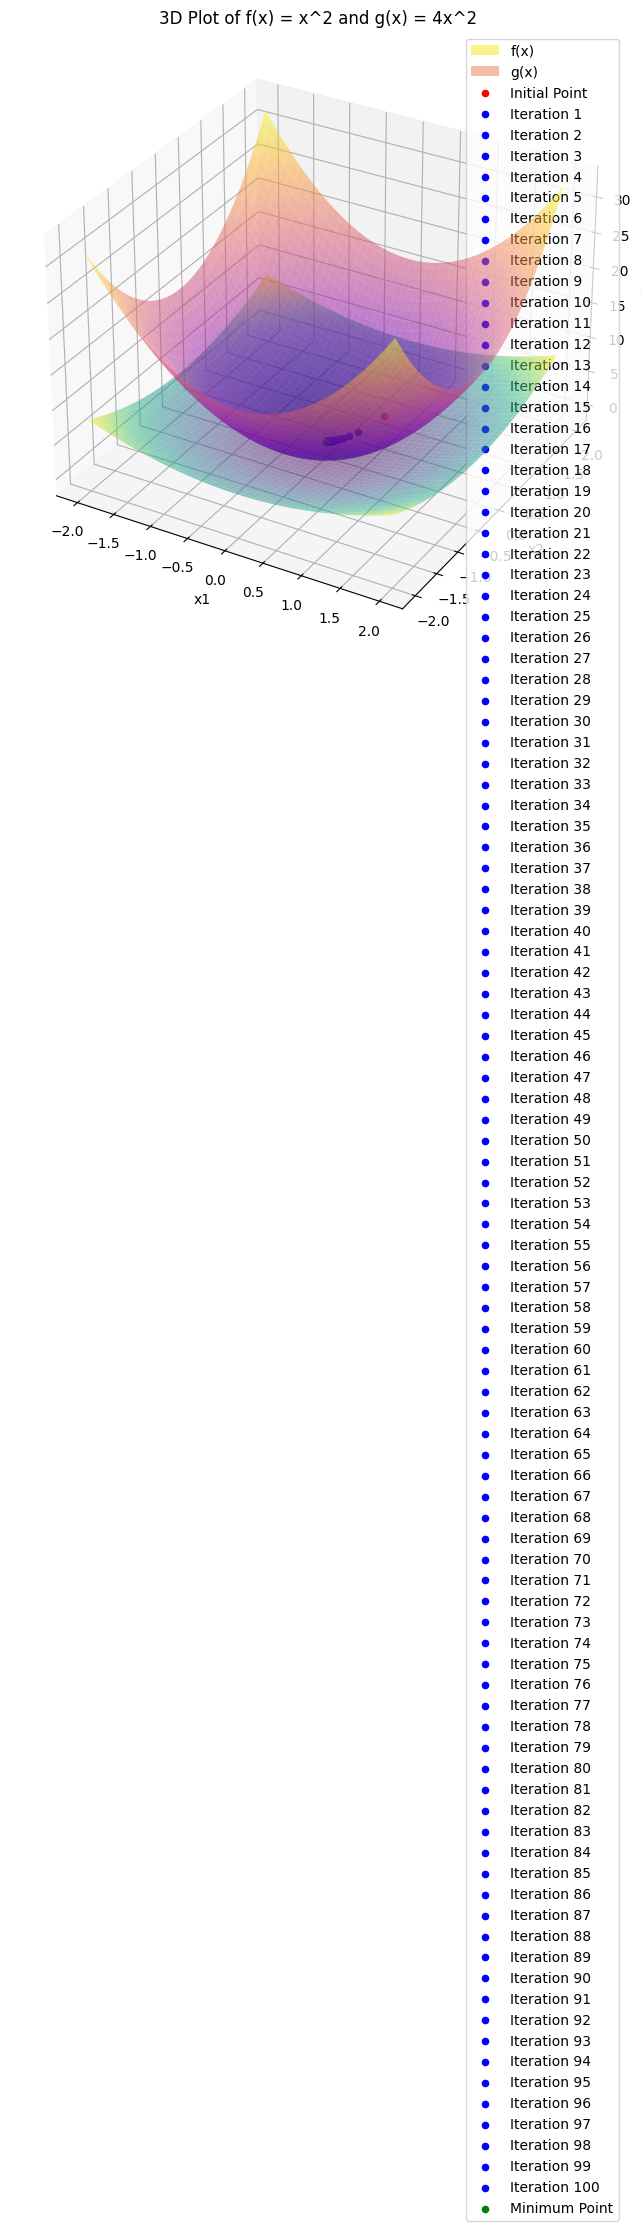

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# Define the functions f(x) and g(x)
def f(x):
    return x[0]**2 + x[1]**2

def g(x):
    return 4 * (x[0]**2 + x[1]**2)

def proximal_operator_g(xbar, dg, tau):
    Id = np.eye(len(xbar))
    dg_xbar = dg(xbar)
    prox_g = np.linalg.inv(Id + tau * dg_xbar)
    return prox_g.dot(xbar)

def convex_subdifferential_g(x):
    return np.array([8 * x[0], 8 * x[1]])  # Example: convex subdifferential of g(x) = x^2


# Initialize variables
x = np.array([0.5, 0.5])  # Initial point
tau = 0.1  # Step size parameter
num_iterations = 100  # Number of iterations

# Generate grid points for x1 and x2
x1_values = np.linspace(-2, 2, 100)
x2_values = np.linspace(-2, 2, 100)
x1, x2 = np.meshgrid(x1_values, x2_values)

# Plot the functions f(x) and g(x) in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surfaces of f(x) and g(x)
ax.plot_surface(x1, x2, f([x1, x2]), cmap='viridis', alpha=0.5, label='f(x)')
ax.plot_surface(x1, x2, g([x1, x2]), cmap='plasma', alpha=0.5, label='g(x)')

# Set labels and title
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Value')
ax.set_title('3D Plot of f(x) = x^2 and g(x) = 4x^2')

# Initialize lists to store the points for plotting
x_values = [x[0]]
y_values = [x[1]]
z_values = [f(x) + g(x)]

# Plot the initial point
ax.scatter(x[0], x[1], f(x) + g(x), color='red', label='Initial Point')

# Perform proximal gradient descent algorithm
for i in range(num_iterations):
    # Update x using the proximal operator for g(x)
    x = proximal_operator_g(x, convex_subdifferential_g, tau)
    
    # Update lists for plotting
    x_values.append(x[0])
    y_values.append(x[1])
    z_values.append(f(x) + g(x))
    
    # Plot the updated point
    ax.scatter(x[0], x[1], f(x) + g(x), color='blue', label=f'Iteration {i+1}')

# Plot the minimum point
minimum_point = np.array([0, 0])
ax.scatter(minimum_point[0], minimum_point[1], f(minimum_point) + g(minimum_point), color='green', label='Minimum Point')

# Add a legend
ax.legend()

plt.show()

# Application for Inverse problem

Below is code expalaination for Inverse problrm with code and output.


 **1. Objective:**


The objective of the code is to solve an inverse problem, where the goal is to reconstruct an unknown signal x from noisy measurements y using a given measurement matrix A.

The problem can be formulated as finding the solution x that minimizes the discrepancy between the measurements y and the product of the measurement matrix A and the unknown signal x.
 
 
 **2. Regularization:**

To promote sparsity in the solution x, the code uses $ℓ_{1}$ regularization, which adds the  $ℓ_{1}$ norm of x as a penalty term to the objective function.


The proximal operator of the  $ℓ_{1}$ norm is applied to the solution vector x at each iteration of the algorithm to enforce sparsity.


**3. Proximal Operator ($prox_{τ∥⋅∥_{1}}$(x)):**


The proximal operator of the  $ℓ_{1}$ norm ( $∥⋅∥_{1}$ ) is defined as the solution to the following optimization problem: $prox_{\tau∥⋅∥_{1}}$(x)= $argmin_{z}$  $(1/2∥z−x∥^{2}+\tau∥z∥_{1})$


poximal operator acts as a soft-thresholding function, setting small coefficients of x to zero.

**4. Algorithm:**

The algorithm iteratively updates the estimate of the unknown signal x using the proximal operator of the ℓ1 norm.

The process continues until convergence or a maximum number of iterations is reached.

**5. Pseudo-Inverse of A:**

To efficiently compute the updates to x, the code precomputes the pseudo-inverse of the measurement matrix A using the np.linalg.pinv() function.


**6. Example Inverse Problem:**


An example inverse problem is created by generating a random measurement matrix A and a true unknown signal xtrue.

Noisy measurements y are generated by adding Gaussian noise to the product of A and x true .


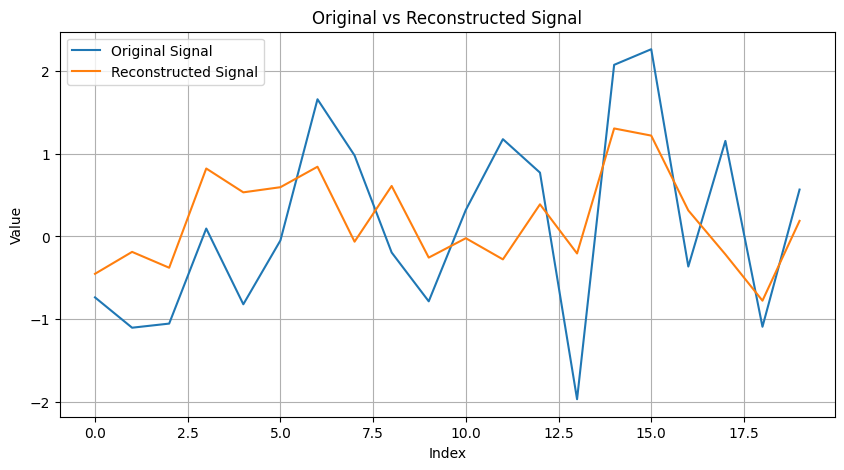

Number of iterations: 1000


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def proximal_operator_l1(x, tau):
    # Calculate the proximal operator of the L1 norm
    return np.maximum(x - tau, 0) - np.maximum(-x - tau, 0)

def solve_inverse_problem(A, y, max_iter=1000, tol=1e-6, tau=0.1):
    n = A.shape[1]  # Dimension of the unknown signal

    # Initialize primal variable
    x = np.zeros(n)

    # Compute pseudo-inverse of A for efficient computation
    A_pseudo_inv = np.linalg.pinv(A)

    for i in range(max_iter):
        # Update primal variable
        x_new = A_pseudo_inv @ y

        # Apply proximal operator of L1 norm for sparsity-promoting regularization
        x_new = proximal_operator_l1(x_new, tau)

        x = x_new

    return x, i + 1  # Return solution and number of iterations

# Example inverse problem
# Generate random measurement matrix A and noisy measurements y
A = np.random.randn(10, 20)  # Measurement matrix
x_true = np.random.randn(20)  # True unknown signal
y = A @ x_true + 0.1 * np.random.randn(10)  # Noisy measurements

# Solve inverse problem
reconstructed_signal, num_iterations = solve_inverse_problem(A, y)

# Plot original and reconstructed signals
plt.figure(figsize=(10, 5))
plt.plot(x_true, label='Original Signal')
plt.plot(reconstructed_signal, label='Reconstructed Signal')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Original vs Reconstructed Signal')
plt.legend()
plt.grid(True)
plt.show()

print("Number of iterations:", num_iterations)


# 4 References

1. Luke, D. R., Malitsky, Y. (2018). Block-coordinate primal-dual method for nonsmooth minimization over linear constraints. Large-Scale and Distributed Optimization, 121-147.

2. X. Yuan and J. Yang. Sparse and low-rank matrix decomposition via alternating directionmethods. preprint, 12, 2009

3. G. Polya and G. Szeg ´ o. ¨ Problems and Theorems in Analysis I: Series. Integral Calculus.Theory of Functions. Springer Science & Business Media, 1978.

4. D. A. Lorenz, F. Schopfer, and S. Wenger. The linearized Bregman method via split feasibility ¨problems: Analysis and generalizations. SIAM Journal on Imaging Sciences, 7(2):1237–1262, 2014.

5. R. Glowinski and A. Marroco. Sur l’approximation, par elements finis d’ordre un, et las resolution, par penalisation-dualite, d’une classe de problemes de dirichlet non lineares. ` Revue Francais d’Automatique, Informatique et Recherche Operationelle ´ , 9(R-2):41–76, 1975.

6. J. Bolte, S. Sabach, and M. Teboulle. Proximal alternating linearized minimization for nonconvex and nonsmooth problems. Mathematical programming, 146(1-2):459–494, 2014.

7. S. Banert, R. I. Bot, and E. R. Csetnek. Fixing and extending some recent results on the admm algorithm. arXiv preprint arXiv:1612.05057, 2016.